<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1ZU7stSFL1DFKlwRRitDWvkjybogdYhYe?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [ ]:
!wget 'https://raw.githubusercontent.com/blaze-fire/hotnot_assignment/main/TRAIN.csv'

--2022-05-16 08:42:09--  https://raw.githubusercontent.com/blaze-fire/hotnot_assignment/main/TRAIN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12011775 (11M) [text/plain]
Saving to: ‘TRAIN.csv’

TRAIN.csv           100%[===================>]  11.46M  --.-KB/s    in 0.1s    

2022-05-16 08:42:09 (115 MB/s) - ‘TRAIN.csv’ saved [12011775/12011775]



In [ ]:
!wget 'https://raw.githubusercontent.com/blaze-fire/hotnot_assignment/main/TEST.csv'

--2022-05-16 08:42:09--  https://raw.githubusercontent.com/blaze-fire/hotnot_assignment/main/TEST.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5115588 (4.9M) [text/plain]
Saving to: ‘TEST.csv’

TEST.csv            100%[===================>]   4.88M  --.-KB/s    in 0.07s   

2022-05-16 08:42:10 (67.0 MB/s) - ‘TEST.csv’ saved [5115588/5115588]



#Initial Code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/TRAIN.csv')

In [ ]:
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,1


` Replacing all ? characters with nan's`

In [ ]:
for col in df.columns:
  df[col].replace('?', np.nan, inplace=True)

In [ ]:
df.isnull().sum()/len(df)

race                        0.019204
gender                      0.000000
age                         0.000000
weight                      0.967039
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
payer_code                  0.521099
medical_specialty           0.415015
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.000253
diag_2                      0.004366
diag_3                      0.017477
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
a

`There's just too many missing values in weight column its better to drop it`

In [ ]:
df.drop('weight', axis=1, inplace=True)

In [ ]:
df.select_dtypes(include = 'object')

,race,gender,age,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,Pediatrics-Endocrinology,250.83,NaN,NaN,None,None,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,NaN,276,250.01,255,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,NaN,648,250,V27,None,None,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,NaN,8,250.43,403,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,NaN,197,157,250,None,None,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,Caucasian,Female,[30-40),HM,NaN,337,788,599,None,None,...,No,No,No,No,No,No,No,No,No,Yes
71232,Caucasian,Female,[70-80),MC,Family/GeneralPractice,250.8,707,681,None,None,...,No,No,No,No,No,No,No,No,Ch,Yes
71233,Caucasian,Female,[40-50),MD,Emergency/Trauma,250.8,780,272,None,>8,...,No,No,Up,No,No,No,No,No,Ch,Yes
71234,Caucasian,Male,[70-80),MC,Emergency/Trauma,427,518,799,None,>7,...,No,No,Up,No,No,No,No,No,Ch,Yes


`Frequency of unique elements in categorical columns to check if a particular value in a column is dominating`

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].value_counts()/len(df))
  print('\n\n')

race
Caucasian          0.727146
AfricanAmerican    0.217194
Hispanic           0.018923
Other              0.012522
Asian              0.005012
Name: race, dtype: float64



gender
Female             0.540766
Male               0.459220
Unknown/Invalid    0.000014
Name: gender, dtype: float64



age
[70-80)     0.259054
[60-70)     0.218878
[50-60)     0.173817
[80-90)     0.158263
[40-50)     0.098939
[30-40)     0.039292
[90-100)    0.024833
[20-30)     0.016719
[10-20)     0.008072
[0-10)      0.002134
Name: age, dtype: float64



admission_type_id
1    0.498779
2    0.191799
3    0.175487
5    0.066273
6    0.064349
8    0.003102
7    0.000112
4    0.000098
Name: admission_type_id, dtype: float64



discharge_disposition_id
1     0.589323
3     0.125751
6     0.118536
18    0.051561
2     0.020832
22    0.018277
11    0.016986
5     0.014445
25    0.013757
4     0.009644
7     0.005826
23    0.004576
13    0.002962
14    0.002794
8     0.001474
28    0.001460
15    0.000772
24    

`constants` consists of name of columns with constant values. These features won’t useful for making the prediction of the target variable as they don't provide any useful insights of the data. Hence, It is better to remove these kind of features.

In [ ]:
constants = ['metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'citoglipton', 'examide', ]

In [ ]:
df.loc[:,constants]

,metformin-pioglitazone,metformin-rosiglitazone,glimepiride-pioglitazone,citoglipton,examide
0,No,No,No,No,No
1,No,No,No,No,No
2,No,No,No,No,No
3,No,No,No,No,No
4,No,No,No,No,No
...,...,...,...,...,...
71231,No,No,No,No,No
71232,No,No,No,No,No
71233,No,No,No,No,No
71234,No,No,No,No,No


In [ ]:
df.drop(constants, axis=1, inplace=True)

In [ ]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,...,No,No,No,No,Up,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,...,No,No,No,No,Up,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,...,No,No,No,No,Steady,No,No,Ch,Yes,1


In [ ]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].value_counts()/len(df))
  print('\n\n')

race
Caucasian          0.727146
AfricanAmerican    0.217194
Hispanic           0.018923
Other              0.012522
Asian              0.005012
Name: race, dtype: float64



gender
Female             0.540766
Male               0.459220
Unknown/Invalid    0.000014
Name: gender, dtype: float64



age
[70-80)     0.259054
[60-70)     0.218878
[50-60)     0.173817
[80-90)     0.158263
[40-50)     0.098939
[30-40)     0.039292
[90-100)    0.024833
[20-30)     0.016719
[10-20)     0.008072
[0-10)      0.002134
Name: age, dtype: float64



payer_code
MC    0.258956
HM    0.046620
BC    0.038029
SP    0.036218
MD    0.027037
UN    0.025661
CP    0.018979
CM    0.010697
OG    0.005685
DM    0.004211
PO    0.003692
WC    0.001109
SI    0.000744
CH    0.000674
OT    0.000533
MP    0.000056
Name: payer_code, dtype: float64



medical_specialty
InternalMedicine                 0.180821
Family/GeneralPractice           0.092285
Cardiology                       0.063760
Emergency/Trauma            

In [ ]:
from sklearn import preprocessing
le = preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value',
                                 unknown_value=-1)

In [ ]:
le.fit(df['insulin'].values.reshape(-1, 1))

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

`It is observed that many categorical columns (specified in label_encode_cols) in dataset contains similar labels as show below so its better to encode them with similar numerical labels to maintain consistent labels throughout the dataset`

In [ ]:
le.categories_

[array(['Down', 'No', 'Steady', 'Up'], dtype=object)]

`Save encoding for test data and deployment`

In [ ]:
#name = 'four_classes.npy'
#np.save(name, le.categories_)

In [ ]:
label_encode_cols = ['glyburide-metformin', 'insulin', 'miglitol', 'acarbose', 'rosiglitazone', 'pioglitazone', 'metformin','glyburide', 'glipizide', 'glimepiride', 'chlorpropamide', 'nateglinide', 'repaglinide', 'glipizide-metformin', 'tolazamide', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [ ]:
for col in label_encode_cols:
  df[col] = le.transform(df[col].values.reshape(-1, 1))

`change column can be converted to a yes-no column as it specifies if there is a change or not`

In [ ]:
df['change'].unique()

array(['No', 'Ch'], dtype=object)

In [ ]:
df['change'].replace('Ch', 'Yes', inplace=True)

`Relation b/w max_glu_serum and target column` <br> `There seems to be no relation`

In [ ]:
pd.crosstab(df.max_glu_serum,df.readmitted_NO)

readmitted_NO,0,1
max_glu_serum,,
>200,686,728
>300,566,505
None,31472,34832
Norm,1115,1332


###The relation between both numbers of medications and lab procedures are about the same for readmitted

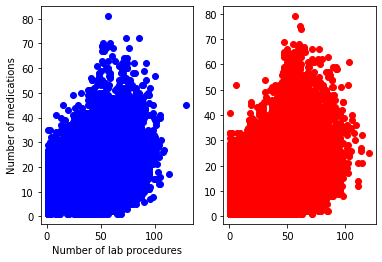

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.scatter(x='num_lab_procedures',y='num_medications',data=df[df['readmitted_NO']==0],color='b')
ax2.scatter(x='num_lab_procedures',y='num_medications',data=df[df['readmitted_NO']==1],color='r')
ax1.set_xlabel('Number of lab procedures')
ax1.set_ylabel('Number of medications')
plt.show()

###It's obvious that ages more than 50 take more medications but the lab procedures isn't in the same range

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


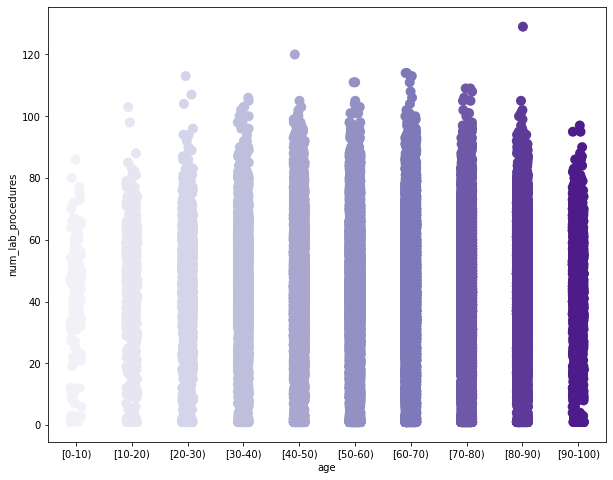

In [ ]:
plt.figure(figsize=[10, 8])
sns.stripplot(df['age'], df['num_lab_procedures'], palette = 'Purples', size = 10)
plt.show()

##There seems to be an anomaly in gender for one row, its better to drop it

In [ ]:
df[df['gender'] == 'Unknown/Invalid']

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted_NO
30506,Other,Unknown/Invalid,[70-80),3,1,1,1,NaN,Cardiology,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Yes,Yes,1


In [ ]:
df.drop(30506, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

##Below shows the people prescribed with diabetes medicine according to the age group and gender <br>
`Like for age group 0-10 more females are prescribed for medicine than males`<br>
`Also there seems to be no correlation b/w the age, gender and diabetes medicine prescribed`


In [ ]:
df[df['diabetesMed'] == 'Yes'].groupby(['age', 'gender'])['diabetesMed'].count()

age       gender
[0-10)    Female      70
          Male        61
[10-20)   Female     291
          Male       210
[20-30)   Female     637
          Male       308
[30-40)   Female    1150
          Male       944
[40-50)   Female    2614
          Male      2714
[50-60)   Female    4709
          Male      4777
[60-70)   Female    5931
          Male      6070
[70-80)   Female    7525
          Male      6495
[80-90)   Female    5156
          Male      3088
[90-100)  Female     849
          Male       347
Name: diabetesMed, dtype: int64

###Below shows the average time spent by people in hospital according to the age group and gender <br>

`It can be observed that time spent by people in hospital increases with age for both genders, which is expected`

In [ ]:
df.groupby(['age', 'gender'])['time_in_hospital'].mean()

age       gender
[0-10)    Female    2.717949
          Male      2.472973
[10-20)   Female    3.048048
          Male      3.582645
[20-30)   Female    3.661783
          Male      3.666667
[30-40)   Female    3.861510
          Male      3.840301
[40-50)   Female    4.094007
          Male      4.088177
[50-60)   Female    4.280000
          Male      4.152599
[60-70)   Female    4.590228
          Male      4.381492
[70-80)   Female    4.810824
          Male      4.616671
[80-90)   Female    5.015330
          Male      4.852920
[90-100)  Female    4.883412
          Male      4.771894
Name: time_in_hospital, dtype: float64

`Also time spent by people in hospital increases with number of medications which is expected.`

In [ ]:
df.groupby(['num_medications'])['time_in_hospital'].mean()

num_medications
1      2.043062
2      2.027933
3      2.243516
4      2.382569
5      2.538663
        ...    
72    13.500000
74    13.000000
75    10.000000
79    12.000000
81    10.000000
Name: time_in_hospital, Length: 75, dtype: float64

### time spent by people in hospital wrt race and age

`Hispanic in general spend mre time on average than other races`

In [ ]:
df.groupby(['race', 'age'])['time_in_hospital'].mean()

race             age     
AfricanAmerican  [0-10)      2.812500
                 [10-20)     3.218085
                 [20-30)     4.083900
                 [30-40)     3.959016
                 [40-50)     4.378632
                 [50-60)     4.336722
                 [60-70)     4.741051
                 [70-80)     4.927453
                 [80-90)     5.079264
                 [90-100)    4.909091
Asian            [0-10)      2.500000
                 [10-20)     2.000000
                 [20-30)     3.333333
                 [30-40)     3.700000
                 [40-50)     2.961538
                 [50-60)     4.076923
                 [60-70)     3.868132
                 [70-80)     4.284091
                 [80-90)     3.666667
                 [90-100)    3.833333
Caucasian        [0-10)      2.562500
                 [10-20)     3.321229
                 [20-30)     3.414781
                 [30-40)     3.804469
                 [40-50)     3.977025
                 [50-60)

`There is no clear bias towards any specific value`

In [ ]:
pd.crosstab(df['medical_specialty'], df['readmitted_NO'])

readmitted_NO,0,1
medical_specialty,,
AllergyandImmunology,6,1
Anesthesiology,3,8
Anesthesiology-Pediatric,6,13
Cardiology,2003,2538
Cardiology-Pediatric,5,2
...,...,...
Surgery-PlasticwithinHeadandNeck,1,0
Surgery-Thoracic,32,39
Surgery-Vascular,223,215


### Time spent in hospital vs medical_specialty based on gender 

In [ ]:
df['medical_specialty'].replace(np.nan, 'Missing', inplace=True)

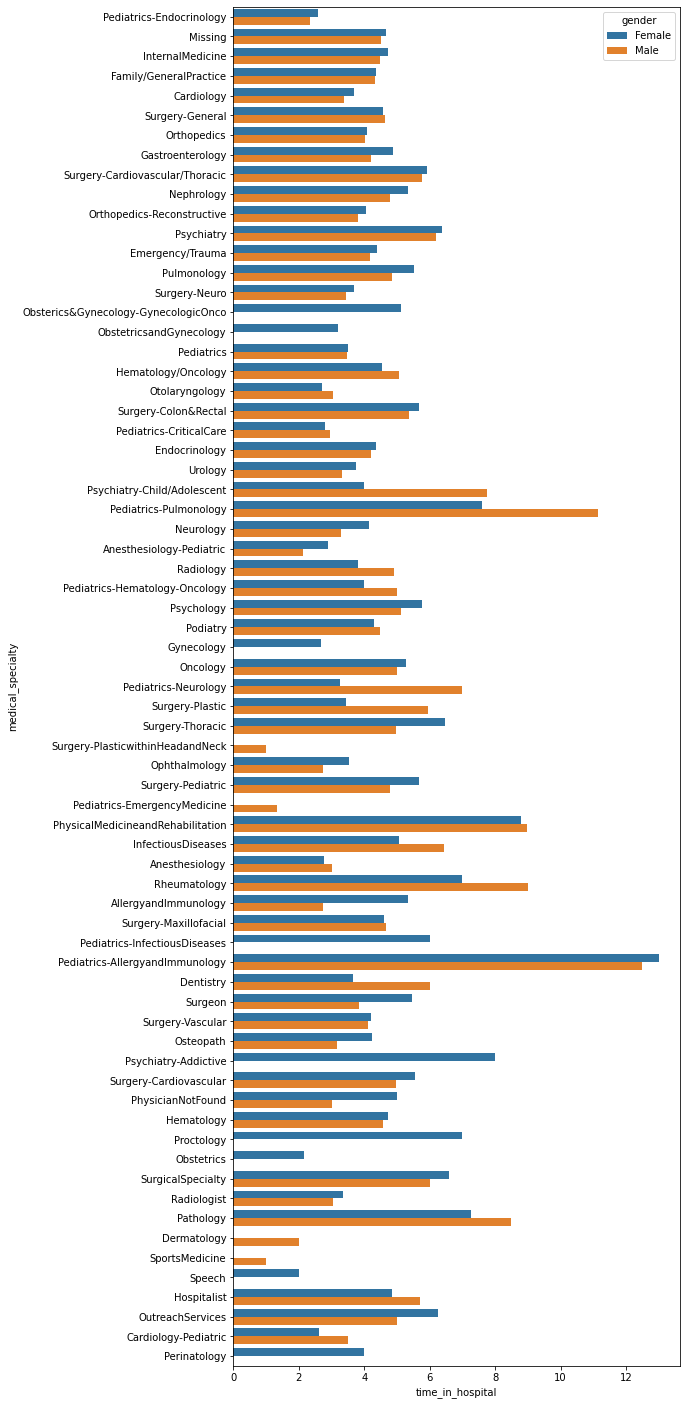

In [ ]:
plt.figure(figsize=[8, 25])
sns.barplot(y = df['medical_specialty'], x = df['time_in_hospital'], ci=False , hue=df['gender'])

`Converting diag columns to numeric columns and replacing all invalid values as nan's`

In [ ]:
df.diag_1=pd.to_numeric(df.diag_1,errors='coerce')
df.diag_2=pd.to_numeric(df.diag_2,errors='coerce')
df.diag_3=pd.to_numeric(df.diag_3,errors='coerce')

### Distribution of diag_1, 2, 3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

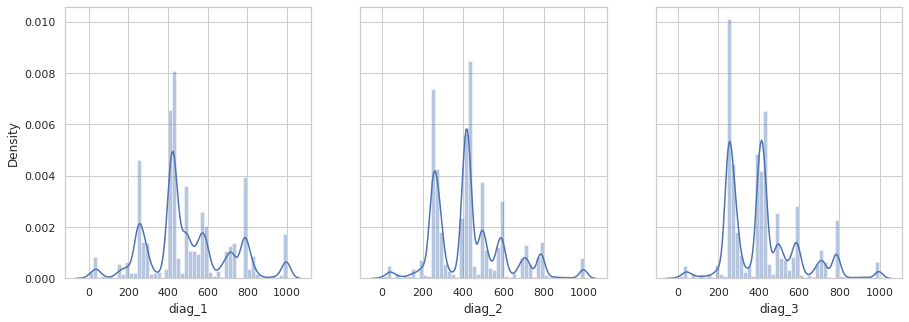

In [ ]:
sns.set(style = 'whitegrid')

fig, axs = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)
sns.distplot(df.diag_1, ax=axs[0])
sns.distplot(df.diag_2, ax=axs[1])
sns.distplot(df.diag_3, ax=axs[2])
plt.show()

##We observe that the values are missing at random and there is no correlation between missing values and target variable   

In [ ]:
print(df[df['diag_1'].isnull()]['readmitted_NO'].value_counts())
print(df[df['diag_3'].isnull()]['readmitted_NO'].value_counts())
print(df[df['diag_3'].isnull()]['readmitted_NO'].value_counts())

0    682
1    621
Name: readmitted_NO, dtype: int64
1    2730
0    2070
Name: readmitted_NO, dtype: int64
1    2730
0    2070
Name: readmitted_NO, dtype: int64


##As missing values are less its better to compute missing values at random to preserve variance

In [ ]:
print(df.diag_1.isnull().sum())
print(df.diag_2.isnull().sum())
print(df.diag_3.isnull().sum())

1303
1977
4800


### imputing missing values randomly to preserve the distribution

In [ ]:
def impute_nan(df,variable):
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample
    

In [ ]:
for col in ['diag_1', 'diag_2', 'diag_3']:
  impute_nan(df, col)

`the distribution of these columns remains unaffected`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

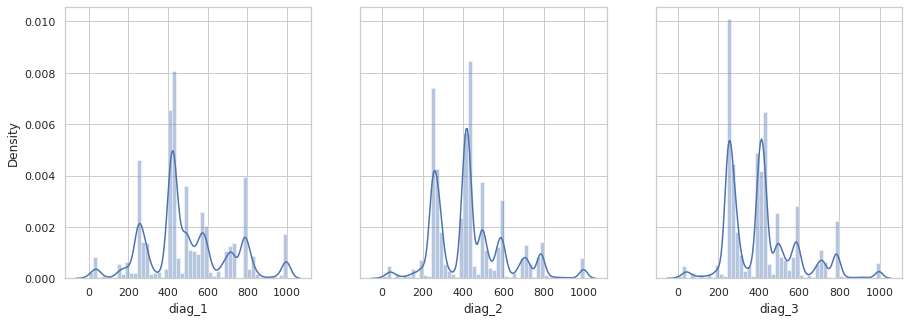

In [ ]:
sns.set(style = 'whitegrid')

fig, axs = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)
sns.distplot(df.diag_1, ax=axs[0])
sns.distplot(df.diag_2, ax=axs[1])
sns.distplot(df.diag_3, ax=axs[2])
plt.show()

In [ ]:
df.select_dtypes(include='object').isnull().sum()

race                  1368
gender                   0
age                      0
payer_code           37120
medical_specialty        0
max_glu_serum            0
A1Cresult                0
change                   0
diabetesMed              0
dtype: int64

In [ ]:
#Replacing nans with new category missing
df['race'].replace(np.nan, 'Missing', inplace=True)
df['payer_code'].replace(np.nan, 'Missing', inplace=True)

In [ ]:
df.select_dtypes(include='object').columns

Index(['race', 'gender', 'age', 'payer_code', 'medical_specialty',
       'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed'],
      dtype='object')

In [ ]:
#As these columns below they have d/f categories for every column we will encode each of them 
# and save the encoding for test data and deployment

for col in ['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'change',	'diabetesMed']:
  le =  preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
  df[col] = le.fit_transform(df[col].values.reshape(-1, 1))
  #name = col+'.npy'
  #np.save(name, le.categories_)
  print(le.categories_)

[array(['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Missing',
       'Other'], dtype=object)]
[array(['Female', 'Male'], dtype=object)]
[array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)]
[array(['BC', 'CH', 'CM', 'CP', 'DM', 'HM', 'MC', 'MD', 'MP', 'Missing',
       'OG', 'OT', 'PO', 'SI', 'SP', 'UN', 'WC'], dtype=object)]
[array(['AllergyandImmunology', 'Anesthesiology',
       'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric',
       'Dentistry', 'Dermatology', 'Emergency/Trauma', 'Endocrinology',
       'Family/GeneralPractice', 'Gastroenterology', 'Gynecology',
       'Hematology', 'Hematology/Oncology', 'Hospitalist',
       'InfectiousDiseases', 'InternalMedicine', 'Missing', 'Nephrology',
       'Neurology', 'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics',
       'ObstetricsandGynecology', 'Oncology', 'Ophthalmology',
       'Orthopedics', 'Orthopedics-Reconstr

### Correlation of target variables wrt all variables 

In [ ]:
df.corr()['readmitted_NO'].sort_values(ascending=False)

readmitted_NO               1.000000
medical_specialty           0.044642
num_procedures              0.042195
discharge_disposition_id    0.027590
metformin                   0.023425
gender                      0.014484
race                        0.013999
glyburide                   0.010514
max_glu_serum               0.010455
tolazamide                  0.005792
diag_1                      0.004679
tolbutamide                 0.004196
payer_code                  0.001936
chlorpropamide             -0.001172
A1Cresult                  -0.002286
troglitazone               -0.002490
insulin                    -0.003603
acetohexamide              -0.003939
glipizide-metformin        -0.004015
miglitol                   -0.004284
glimepiride                -0.006899
diag_2                     -0.007509
admission_type_id          -0.007685
rosiglitazone              -0.008325
nateglinide                -0.008494
glyburide-metformin        -0.008891
acarbose                   -0.010693
g

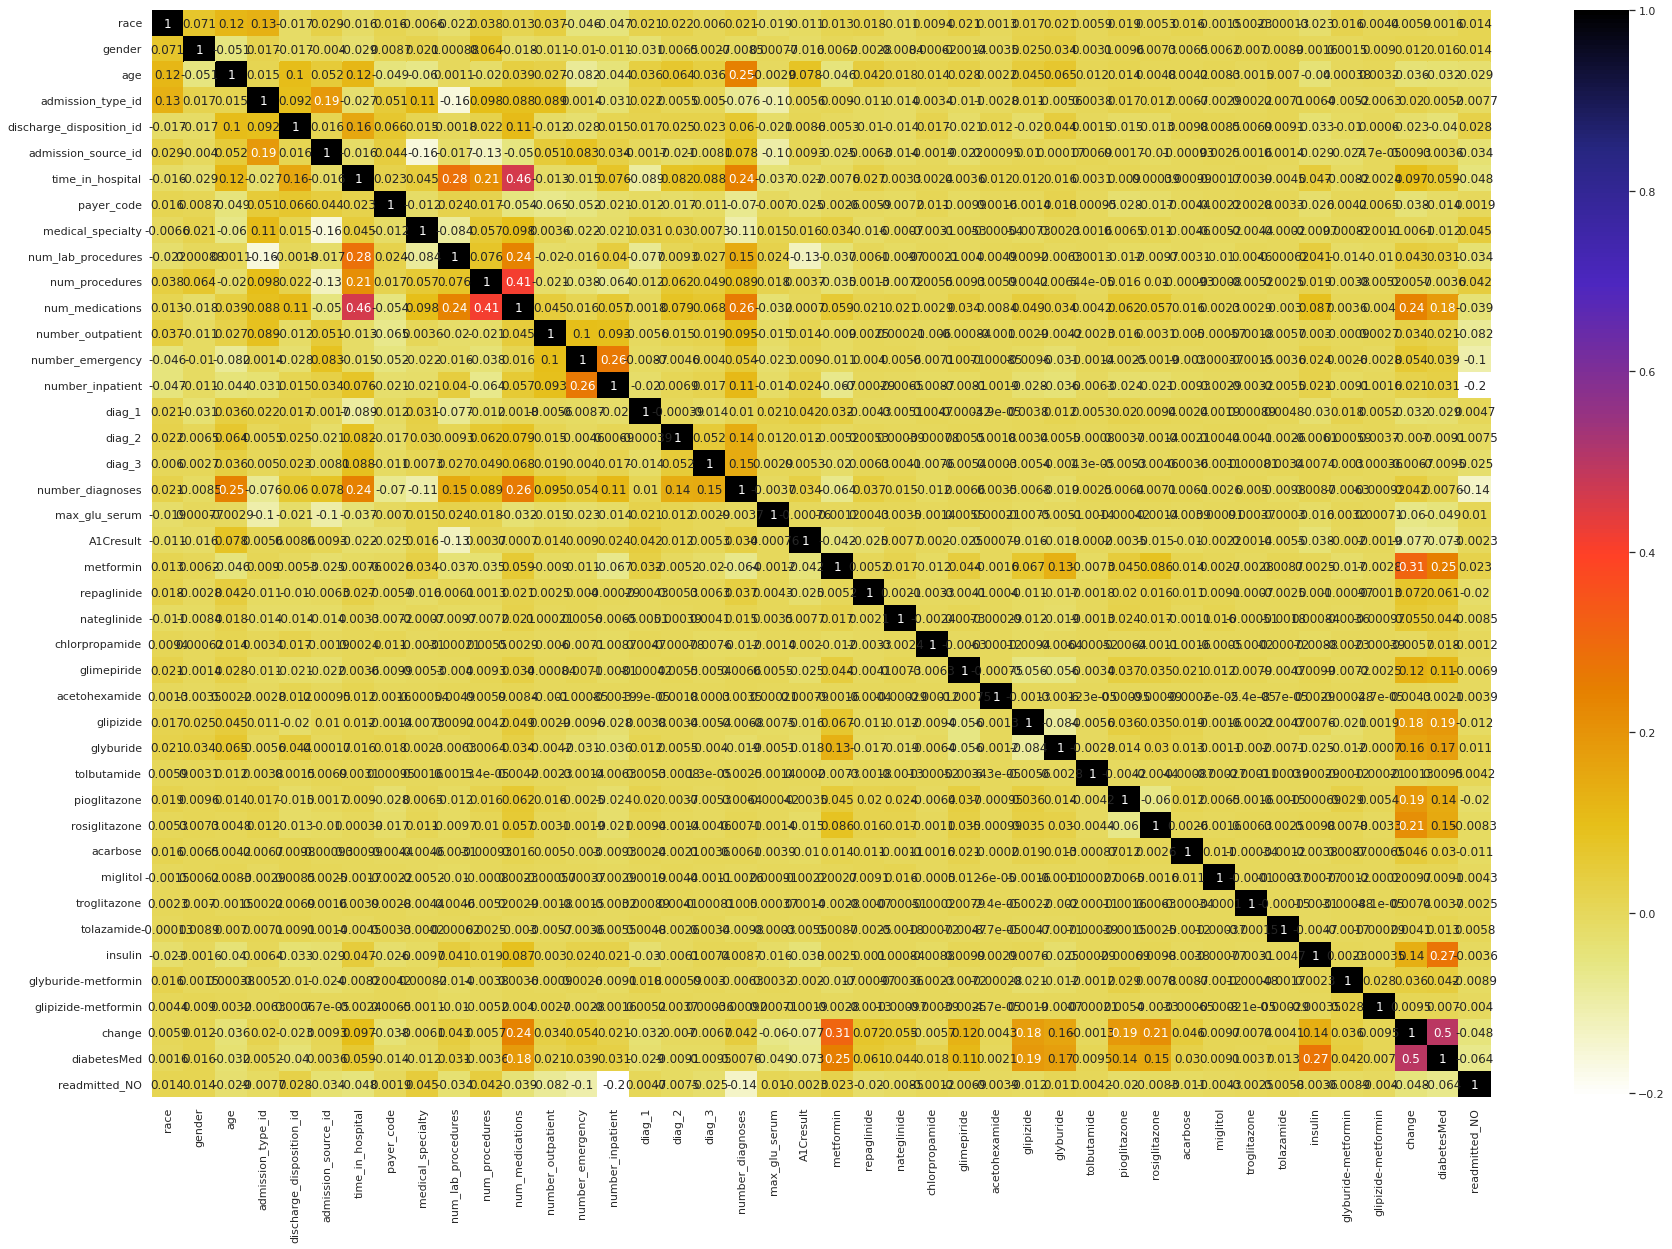

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#Preparing Data

In [ ]:
temp = df.copy()
X_train = temp.drop('readmitted_NO', axis=1)
y_train = temp['readmitted_NO']

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = std_scaler.fit_transform(X_train.values)

In [ ]:
X_train = pd.DataFrame(X_train, columns = df.drop('readmitted_NO', axis=1).columns)

In [ ]:
X_train.shape

(71235, 41)

In [ ]:
X_temp = X_train[:5000]
y_temp = y_train[:5000]

In [ ]:
X_temp.shape

(5000, 41)

# Dimensionality Reduction Algorithms

In [ ]:
#helper function to visualize the clusters
def scatterPlot(xDF, yDF, algoName):
  tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
  tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
  tempDF.columns = ["First Vector", "Second Vector", "Label"]
  sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
  data=tempDF, fit_reg=False)
  ax = plt.gca()
  ax.set_title("Separation of Observations using "+algoName)
  #scatterPlot(X_temp, y_temp, "PCA")

### TSNE

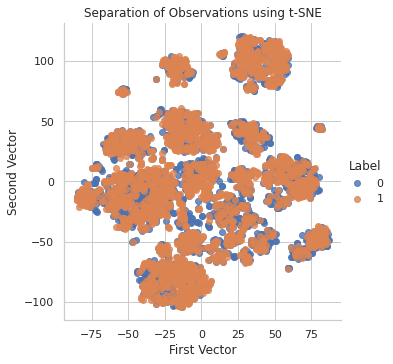

In [ ]:
from sklearn.manifold import TSNE

tSNE = TSNE(n_components = 2, learning_rate = 20, perplexity = 30, n_iter=10000,\
early_exaggeration = 12, init = 'random', random_state = 42)

X_train_tSNE = tSNE.fit_transform(X_train.loc[:5000,:])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=X_train.index.values[:5001])
scatterPlot(X_train_tSNE, y_train, "t-SNE")

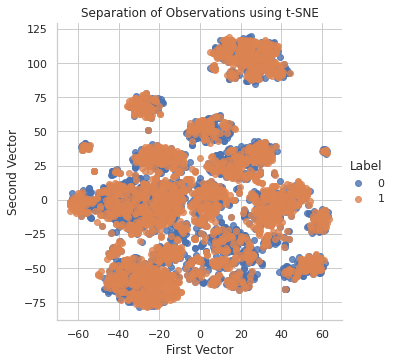

In [ ]:
from sklearn.manifold import TSNE

tSNE = TSNE(n_components = 2, learning_rate = 20, perplexity = 50, n_iter=10000,\
early_exaggeration = 12, init = 'random', random_state = 42)

X_train_tSNE = tSNE.fit_transform(X_train.loc[:5000,:])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=X_train.index.values[:5001])
scatterPlot(X_train_tSNE, y_train, "t-SNE")

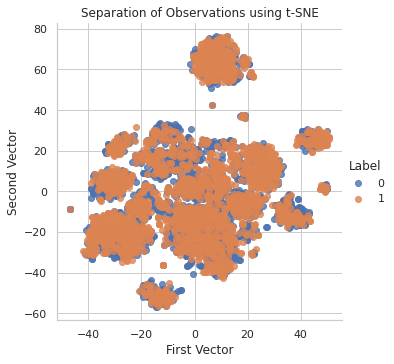

In [ ]:
from sklearn.manifold import TSNE

tSNE = TSNE(n_components = 2, learning_rate = 20, perplexity = 100, n_iter=10000,\
early_exaggeration = 12, init = 'random', random_state = 42)

X_train_tSNE = tSNE.fit_transform(X_train.loc[:5000,:])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=X_train.index.values[:5001])
scatterPlot(X_train_tSNE, y_train, "t-SNE")

### Kernel PCA

In [ ]:
train_index = df.index.values[:10000]
validation_index = df.index.values[5000:10000]

In [ ]:
from sklearn.decomposition import KernelPCA

kernelPCA = KernelPCA(n_components = 2, kernel = 'rbf', gamma = None,random_state = 42)
kernelPCA.fit(X_train.loc[:10000,:])



KernelPCA(kernel='rbf', n_components=2, random_state=42)

In [ ]:
X_train_kernelPCA = kernelPCA.transform(X_train[:10000])
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)

X_validation_kernelPCA = kernelPCA.transform(X_train[10000:15000])

X_validation_kernelPCA = pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)

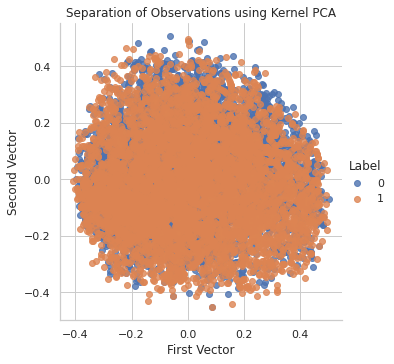

In [ ]:
scatterPlot(X_train_kernelPCA, y_train[:10000], "Kernel PCA")

###Birch

In [ ]:
from sklearn.cluster import Birch

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_thresh = VarianceThreshold(threshold=1)

In [ ]:
X_temp = var_thresh.fit_transform(X_train)

In [ ]:
model = Birch(threshold=0.1, n_clusters=2)

In [ ]:
model.fit(X_temp)

Birch(n_clusters=2, threshold=0.1)

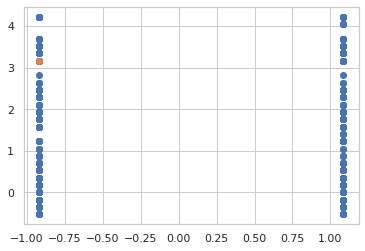

In [ ]:
yhat = model.predict(X_temp)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X_temp[row_ix, 0], X_temp[row_ix, 1])
# show the plot
plt.show()

### Heirarchial Clustering

In [ ]:
!pip install fastcluster

     |████████████████████████████████| 194 kB 5.3 MB/s 


In [ ]:
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist

In [ ]:
from sklearn.decomposition import PCA
n_components = 2
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, \
random_state=random_state)
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index.values)

In [ ]:
cutoff = 100
Z = fastcluster.linkage_vector(X_train_PCA.loc[:,0:cutoff], \
method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z, \
columns=['clusterOne','clusterTwo','distance','newClusterSize'])

In [ ]:
Z_dataFrame

,clusterOne,clusterTwo,distance,newClusterSize
0,16137.0,30107.0,0.000061,2.0
1,22084.0,24763.0,0.000078,2.0
2,35067.0,67812.0,0.000086,2.0
3,25713.0,58023.0,0.000087,2.0
4,43905.0,67247.0,0.000119,2.0
...,...,...,...,...
71229,142458.0,142461.0,190.232008,26515.0
71230,142462.0,142464.0,235.424030,32552.0
71231,142460.0,142463.0,246.042623,28399.0
71232,142459.0,142465.0,322.709980,42836.0


In [ ]:
from scipy.cluster.hierarchy import fcluster
distance_threshold = 400
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = \
pd.DataFrame(data=clusters,index=X_train_PCA.index,columns=['cluster'])

In [ ]:
print("Number of distinct clusters: ", \
len(X_train_hierClustered['cluster'].unique()))

Number of distinct clusters:  2


#K-Means

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    print(xx.shape)
    Z = clusterer.predict(X)
    Z = Z.reshape(100, 100)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
X_train = temp.drop('readmitted_NO', axis=1).values
y_train = temp['readmitted_NO'].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, n_init=10, random_state=11)
kmeans_rnd_10_inits.fit(X_train)

KMeans(n_clusters=5, random_state=11)

(1000, 1000)


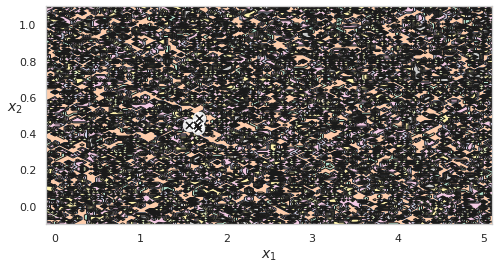

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X_train[:10000])
plt.show()


<li> We use the silhouette score, to detect number of clusters which is the mean silhouette coefficient over all the instances.</li> 
<li>An instance’s silhouette coefficient is equal to (b – a) /max(a, b), where a is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster).</li> 
<li>The silhouette coefficient can vary between –1 and +1.</li> 
<li>A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster</li>

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for cluster in range(2, 12):
  k_temp = KMeans(n_clusters=cluster)
  k_temp.fit(X_train)
  print('cluster: ', cluster)
  print(silhouette_score(X_train, k_temp.labels_))
                     

cluster:  2
0.3333066507004133
cluster:  3
0.27879639704588455
cluster:  4
0.2660352431857301
cluster:  5
0.28354444665351264
cluster:  6
0.2999849590608308
cluster:  7
0.3078805552070906
cluster:  8
0.3202038840142359
cluster:  9
0.32975764805827273
cluster:  10
0.32181903888604063
cluster:  11
0.333177745671845


`We observe that silhouette_score is highest if number of clusters are 2, so we will proceed with tha`

#Autoencoder

<li>Feature extraction canbe used to reduce the number of original features to a smaller subset, effectively performing dimensionality reduction. But feature extraction can also generate new feature representations to help improve performance on supervised learning problems.</li>
<br>
<li>Autoencoders<br>
<li>To generate new feature representations, we can use an autoencoder and effectively reconstructs the original features, learning a new representation using the hidden layers in between.</li>
<li>Each hidden layer of the autoencoder learns a representation of the original
features, and subsequent layers build on the representation learned by the
preceding layers. Layer by layer, the autoencoder learns increasingly
complicated representations from simpler ones.
The output layer is the final newly learned representation of the original
features. This learned representation can then be used as an input into a
supervised learning model with the objective of improving the generalization
error.</li></li>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, \
random_state=42, stratify=y_train)

In [ ]:
#TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
K = keras.backend

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy

Two layer undercomplete autoencoder with linear activation
40 nodes in hidden layer

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model = Sequential()

# Apply linear activation function to input layer
# Generate hidden layer with 20 nodes
model.add(Dense(units=40, activation='linear',input_dim=41))

# Apply linear activation function to hidden layer
# Generate output layer with 29 nodes
model.add(Dense(units=41, activation='linear'))

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train the model
num_epochs = 15
batch_size = 32

history = model.fit(x=X_train, y=X_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train, X_train),
                    verbose=1)

Epoch 1/15
1492/1492 [==============================] - 14s 7ms/step - loss: 729.8202 - accuracy: 0.8782 - val_loss: 6.9480 - val_accuracy: 0.9642
Epoch 2/15
1492/1492 [==============================] - 10s 7ms/step - loss: 3.7791 - accuracy: 0.9679 - val_loss: 2.0808 - val_accuracy: 0.9740
Epoch 3/15
1492/1492 [==============================] - 10s 7ms/step - loss: 1.3032 - accuracy: 0.9751 - val_loss: 0.8506 - val_accuracy: 0.9821
Epoch 4/15
1492/1492 [==============================] - 8s 6ms/step - loss: 0.5807 - accuracy: 0.9801 - val_loss: 0.3940 - val_accuracy: 0.9826
Epoch 5/15
1492/1492 [==============================] - 10s 7ms/step - loss: 0.3110 - accuracy: 0.9816 - val_loss: 0.2273 - val_accuracy: 0.9791
Epoch 6/15
1492/1492 [==============================] - 8s 5ms/step - loss: 0.1855 - accuracy: 0.9818 - val_loss: 0.1741 - val_accuracy: 0.9875
Epoch 7/15
1492/1492 [==============================] - 10s 7ms/step - loss: 0.1337 - accuracy: 0.9820 - val_loss: 0.0948 - val_ac

In [ ]:
# Evaluate on test set
predictions = model.predict(X_test, verbose=1)

735/735 [==============================] - 1s 2ms/step


#Tree Models

Now we know the number of clusters from silhouette score, and we have the target variables also, so we can treat this problem as a classification problem and apply models accordingly  

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state = 42)

In [ ]:
from sklearn import metrics

In [ ]:

from sklearn.model_selection import GridSearchCV

parameters = { 
              'learning_rate': [0.01, 0.03, 0.09], #so called `eta` value
              'max_depth': [5],
              'min_child_weight': [6],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200, 500, 1500],
              'tree_method' : ['gpu_hist']
              }

In [ ]:

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 2,
                        verbose=10)

xgb_grid.fit(X_train, y_train)



Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=6, n_estimators=200, subsample=0.7, tree_method=gpu_hist
[CV 1/2; 1/9] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=6, n_estimators=200, subsample=0.7, tree_method=gpu_hist;, score=0.637 total time=   2.8s
[CV 2/2; 1/9] START colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=6, n_estimators=200, subsample=0.7, tree_method=gpu_hist
[CV 2/2; 1/9] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=6, n_estimators=200, subsample=0.7, tree_method=gpu_hist;, score=0.636 total time=   2.8s
[CV 1/2; 2/9] START colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=6, n_estimators=500, subsample=0.7, tree_method=gpu_hist
[CV 1/2; 2/9] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=6, n_estimators=500, subsample=0.7, tree_me

GridSearchCV(cv=2, estimator=XGBClassifier(random_state=42),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.03, 0.09], 'max_depth': [5],
                         'min_child_weight': [6],
                         'n_estimators': [200, 500, 1500], 'subsample': [0.7],
                         'tree_method': ['gpu_hist']},
             verbose=10)

In [ ]:
best_params = xgb_grid.best_params_

In [ ]:
best_params

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 6,
 'n_estimators': 1500,
 'subsample': 0.7,
 'tree_method': 'gpu_hist'}

In [ ]:
#xgb = XGBClassifier(colsample_bytree =  0.7,  learning_rate= 0.01, max_depth = 5, min_child_weight =  6, n_estimators = 1500, subsample= 0.7, random_state=42)

In [ ]:
#xgb.fit(X_train.values, y_train.values)

In [ ]:
#xgb.save_model('xgb_model.bin')

#prepare test data

In [ ]:
test_df = pd.read_csv('/content/TEST.csv')

In [ ]:
test_df.drop('index', axis=1, inplace=True)

In [ ]:
print(test_df.columns)

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=544268d6b13090fc23c43c221e3c28840436900d6d90ba018aca193d30feea41
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget
def get(url):
  wget.download(url)

In [ ]:
def preprocess(test_df):
  for col in test_df.columns:
    test_df[col].replace('?', np.nan, inplace=True)
  
  test_df.drop('weight', axis=1, inplace=True)

  constants = ['metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'citoglipton', 'examide', ]

  test_df.drop(constants, axis=1, inplace=True)

  label_encode_cols = ['glyburide-metformin', 'insulin', 'miglitol', 'acarbose', 'rosiglitazone', 'pioglitazone', 'metformin','glyburide', 'glipizide', 'glimepiride', 'chlorpropamide', 'nateglinide', 'repaglinide', 'glipizide-metformin', 'tolazamide', 'troglitazone', 'tolbutamide', 'acetohexamide']

  le = preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
  url = 'https://github.com/blaze-fire/hotnot_assignment/blob/main/four_classes.npy?raw=true'
  get(url)
  temp = np.load('four_classes.npy', allow_pickle=True)
  temp = temp.tolist()[0]

  for col in label_encode_cols:
    val = test_df[col].values  
    new = []
    for x in val:
      try:
        new.append(temp.index(x))
      except:
        new.append(-1)
    test_df[col] = new
    


  test_df.diag_1=pd.to_numeric(test_df.diag_1,errors='coerce')
  test_df.diag_2=pd.to_numeric(test_df.diag_2,errors='coerce')
  test_df.diag_3=pd.to_numeric(test_df.diag_3,errors='coerce')
  
  for col in ['diag_1', 'diag_2', 'diag_3']:
    impute_nan(test_df, col)
    
  test_df['race'].replace(np.nan, 'Missing', inplace=True)
  test_df['payer_code'].replace(np.nan, 'Missing', inplace=True)


  for col in ['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'change',	'diabetesMed']:
    url = 'https://github.com/blaze-fire/hotnot_assignment/blob/main/'+col+'.npy?raw=true'
    get(url)
    name = col+'.npy'
    temp = np.load(name, allow_pickle=True)
    temp = temp.tolist()[0]
    
    val = test_df[col].values  
    new = []
    for x in val:
      try:
        new.append(temp.index(x))
      except:
        new.append(-1)
    test_df[col] = new
  
  return test_df
  

In [ ]:
test_df = preprocess(test_df)

In [ ]:
import pickle

## Predictions with trained autoencoder

In [ ]:
train_data = model.predict(X_train)

In [ ]:
xgb = XGBClassifier(colsample_bytree =  0.7,  learning_rate= 0.01, max_depth = 5, min_child_weight =  6, n_estimators = 1500, subsample= 0.7, random_state=42, tree_method='gpu_hist')

In [ ]:
xgb.fit(train_data, y_train)

XGBClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=5,
              min_child_weight=6, n_estimators=1500, random_state=42,
              subsample=0.7, tree_method='gpu_hist')

In [ ]:
AEpred = xgb.predict(test_df.values)

In [ ]:
AEpred

array([1, 1, 1, ..., 1, 0, 1])

## Create submission file

In [ ]:
#sub = pd.DataFrame({'index':np.arange(0, len(AEpred)), 'target':AEpred})

In [ ]:
#sub.to_csv('sub.csv', index=False)

## Results with one submission with auto encoder plus xgboost and other with only lightgbm 

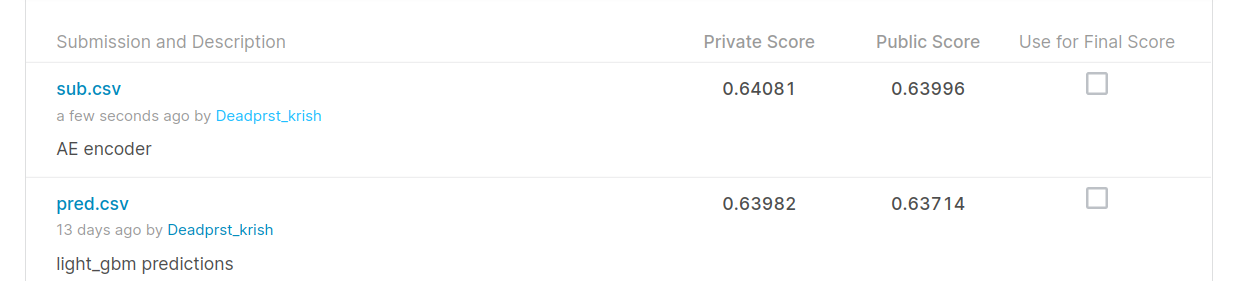